<a href="https://colab.research.google.com/github/extrajp2014/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [106]:
# preview data
print("df shape:"), print(df.shape), print("")
print("df columns:"), print(df.columns), print("")
print("df dtypes:"), print(df.dtypes), print("")
print("df sample(7).T:"), print(df.sample(7).T), print("")
print("df isnull().sum().sum():"), print(df.isnull().sum().sum()), print("")
# stats data
print("df corr().T:"), print(df.corr().T), print("")
print("df describe(include='all').T:"), print(df.describe(include='all').T), print("")

df shape:
(8495, 9)

df columns:
Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object')

df dtypes:
make              int64
price           float64
body              int64
mileage           int64
engV            float64
engType           int64
registration      int64
year              int64
drive             int64
dtype: object

df sample(7).T:
                2487    6948    3422     998      2112    3849     3798
make             4.0    76.0    17.0     67.0      5.0    50.0     33.0
price         4700.0  2800.0  5400.0  11300.0  16700.0  7700.0  12650.0
body             3.0     3.0     2.0      3.0      3.0     3.0      1.0
mileage        400.0   167.0    15.0     70.0    150.0   230.0     36.0
engV             2.6     1.5     1.5      1.8      2.0     2.0      1.4
engType          3.0     3.0     1.0      3.0      0.0     3.0      0.0
registration     1.0     1.0     1.0      1.0      1.0     1.0      1.0
year   

(None, None, None)

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [107]:
X = df.drop(columns=['price'], axis=1)
y = df['price'].values
print(X.head())

   make  body  mileage  engV  engType  registration  year  drive
0    23     0       68   2.5        1             1  2010      1
1    50     3      173   1.8        1             1  2011      2
2    50     2      135   5.5        3             1  2008      2
3    50     5      162   1.8        0             1  2012      0
4    55     0       83   2.0        3             1  2013      1


## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
# Split training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
# Linear Regression Train Model
model = LinearRegression()
model.fit(X_train, Y_train)

y_test_predict = model.predict(X_test)
MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)
m_hat = model.coef_
b_hat = model.intercept_

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [110]:
print("Features:", X.columns.values)
print("Coefficients:", m_hat)
print("Intercept:", b_hat)

Features: ['make' 'body' 'mileage' 'engV' 'engType' 'registration' 'year' 'drive']
Coefficients: [  -35.16726588 -1770.98509064   -40.26859658   273.03540784
 -1111.08031708  4535.06013378  1140.73124767  8292.04613874]
Intercept: -2269355.0772314165


## 1.5 Use the test data to make predictions

In [111]:
print("------Verify data shape------")
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape) 
print("Y_train.shape:", Y_train.shape)
print("Y_test.shape:", Y_test.shape)
print("y_test_predict.shape:", y_test_predict.shape)

print("")
print("------Use test data to make predictions------")
print("y_test_predict values:", y_test_predict)

------Verify data shape------
X_train.shape: (6796, 8)
X_test.shape: (1699, 8)
Y_train.shape: (6796,)
Y_test.shape: (1699,)
y_test_predict.shape: (1699,)

------Use test data to make predictions------
y_test_predict values: [19200.26639279  5355.00284406 26205.12415048 ... 29728.80723151
  8920.98307381 14092.87146182]


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [112]:
print('RMSE:',RMSE)
print('R^2:',R2)

RMSE: 21394.43524600266
R^2: 0.29213322373743256


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

Coefficient corresponding to the year is 1140.73124767.  If the year increase by 1 integer, the price also increase by $1140.73124767.

## 1.8 How should we interpret the Root-Mean-Square Error?

RMSE (root mean square error) is 21394.43524600266. Our predicted values have an average of $21394 difference from the actual values.

## 1.9 How should we interpret the $R^2$?

R^2 is 0.29213322373743256.  It is a statistical measure of how close the data are fitted to our regression line.  Our prediction model can explain 29.21% of the variability of the response data around its mean.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [113]:
df['ln_price'] = np.log(df['price'])
df.head(5)

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

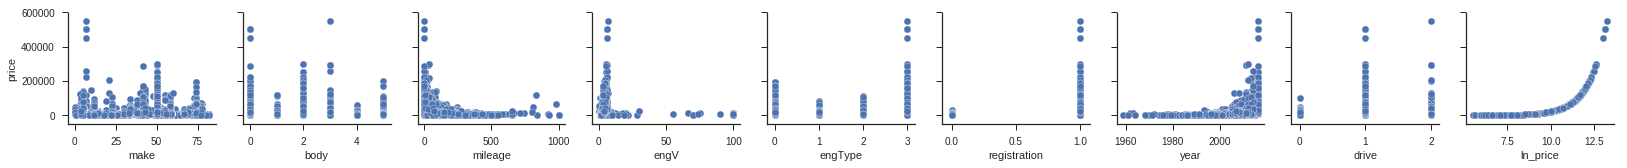

In [114]:
# Preview graph 1
sns.set(style="ticks", color_codes=True)
x_columns = df.columns.drop('price')
sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns)

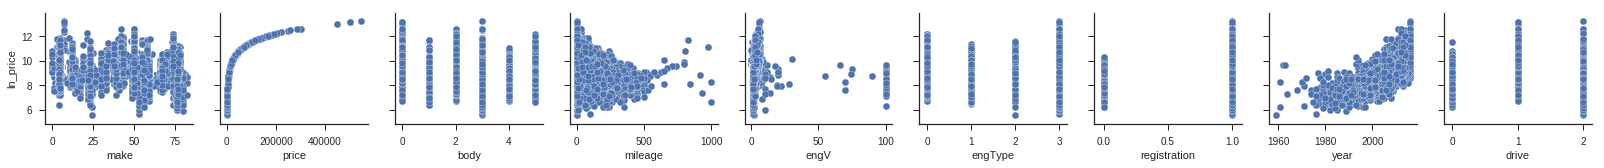

In [115]:
# Preview graph 2
sns.set(style="ticks", color_codes=True)
x_columns = df.columns.drop('ln_price')
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [116]:
# mileage and engV graphs show they have potential nonlinear relationship with price
df['square_mileage'] = df['mileage']**2
df['square_engV'] = df['engV']**2
df.head(5)

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,square_mileage,square_engV
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4624,6.25
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,29929,3.24
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,18225,30.25
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,26244,3.24
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,6889,4.00


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [117]:
def linear_regression(X,y,test_size=.2, random_state=42):
  # Set values for Linear Regression
  X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  # Linear Regression Train Model
  model = LinearRegression()
  model.fit(X_train, Y_train)
  y_test_predict = model.predict(X_test)
  MSE = mean_squared_error(Y_test, y_test_predict)
  RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
  R2 = r2_score(Y_test, y_test_predict)
  m_hat = model.coef_[0]
  b_hat = model.intercept_
  return m_hat, b_hat, RMSE, R2

X = df.drop(columns=['ln_price','price'], axis=1)
y = df.loc[:, ['ln_price']].values
m_hat, b_hat, RMSE, R2 = linear_regression(X,y)

print("Features:", X.columns.values)
print("Coefficients:", m_hat)
print("Intercept:", b_hat)
print('RMSE:',RMSE)
print('R^2:',R2)

print("")
print("------------")
for i,j in enumerate(m_hat):
  print(X.columns.values[i],"coefficients:",m_hat[i])
print("------------")

Features: ['make' 'body' 'mileage' 'engV' 'engType' 'registration' 'year' 'drive'
 'square_mileage' 'square_engV']
Coefficients: [-1.09835536e-03 -6.62990697e-02 -1.19465363e-03  2.54727623e-01
 -5.84376382e-02  7.38742756e-01  8.96707324e-02  2.67590057e-01
  2.07652613e-06 -2.55409457e-03]
Intercept: [-171.74460672]
RMSE: 0.5408474049396205
R^2: 0.6947758001447801

------------
make coefficients: -0.001098355355495426
body coefficients: -0.06629906965414495
mileage coefficients: -0.001194653628329601
engV coefficients: 0.25472762255772696
engType coefficients: -0.05843763815800732
registration coefficients: 0.7387427555347323
year coefficients: 0.08967073238031091
drive coefficients: 0.26759005698532773
square_mileage coefficients: 2.0765261262017942e-06
square_engV coefficients: -0.002554094574345194
------------


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

Coefficient corresponding to the year is 8.96707324e-02.  If the year increase by 1 integer, the price also increase by 8.967%

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent seek to minimize the cost function, which quantify the mean square difference  between the predicted value and the actual value.  It use derivative of the cost function to find the minimum of such function and update the parameters of our predict model to achieve accuracy. In linear regression, we use it  as an optimization algorithm to achieve the best fit line for our data.

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate , also known as alpha, determine how fast we go through the iteration of gradient descent. If the learning rate is too small, it will take greater amount of iterations to reach the minimum of the cost function.  If it is too high, we might not converge and can lead to divergent behaviors.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [118]:
# data source
X = df.drop(columns=['ln_price','price'], axis=1)
y = df.loc[:, ['ln_price']].values

# Robust Standard Errors
X = sm.add_constant(X) # Same as using np.ones to add a vector of ones
model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1700.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:56:21   Log-Likelihood:                -6184.9
No. Observations:                8495   AIC:                         1.239e+04
Df Residuals:                    8484   BIC:                         1.247e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -171.2212      3.379    -50.

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i ) for i in range(X.shape[1])]
print(X.columns.values)
print(vif)

print("")
print("------------")
for i,j in enumerate(vif):
  if vif[i] > 10: print(X.columns[i],"VIF:",vif[i])
print("------------")
print("eng and square_engV have VIF > 10, which is a signal for multicollienearity problems")

['const' 'make' 'body' 'mileage' 'engV' 'engType' 'registration' 'year'
 'drive' 'square_mileage' 'square_engV']
[126750.78969847022, 1.0613174325230188, 1.188380548045528, 5.4354121595903235, 23.656927948083766, 1.147303080438799, 1.0958895470883614, 1.499661052461688, 1.2443304886152922, 4.38273918065778, 23.497600495727244]

------------
const VIF: 126750.78969847022
engV VIF: 23.656927948083766
square_engV VIF: 23.497600495727244
------------
eng and square_engV have VIF > 10, which is a signal for multicollienearity problems


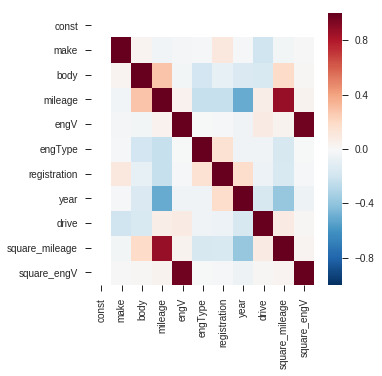

In [120]:
# Variables that have high levels of multicollinearity should also be highly 
# correlated with each other
fig = plt.figure(figsize=(5, 5))
sns.heatmap(X.corr());